# Кластеризация & метрики качества

In [41]:
import numpy as np

In [42]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

### Данные

в sklearn.datasets есть разные наборы данных, можно выбрать другие

In [43]:
from sklearn.datasets import make_moons,make_blobs

In [44]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [45]:
X[:, 1]

array([ 0.5216447 , -0.37982927,  0.27372826, -0.07543984, -0.17069874,
       -0.04238449,  0.20999374, -0.48936735,  0.36637762, -0.53460385,
        0.82790185, -0.23856676, -0.13088387, -0.40685761,  0.64235178,
        0.20850838,  0.88616823, -0.30101351,  0.88827765,  0.82253872,
        0.01214146, -0.47653216,  0.99672359, -0.37071087,  1.02538452,
       -0.07627812, -0.09773674,  0.0449402 , -0.08613126,  0.89639036,
        0.52265882,  0.84091882, -0.46457771,  0.19457898,  0.67223332,
        0.21178339, -0.23007221,  0.09923426,  0.52414334,  0.35721873,
       -0.42493298,  0.85940389,  0.71235382,  0.06721414, -0.34012196,
        0.95506411,  0.19210044,  0.65476676, -0.10771978, -0.4594568 ,
        0.80133734, -0.19619019,  0.03848682,  0.05723938, -0.50020349,
        0.65688005,  0.73635744, -0.47577903,  0.94246199,  0.99290594,
       -0.29065432,  0.16290244, -0.1244931 ,  0.53065346, -0.46733763,
        0.2365448 ,  1.01497482, -0.3808977 ,  0.97792142,  0.45

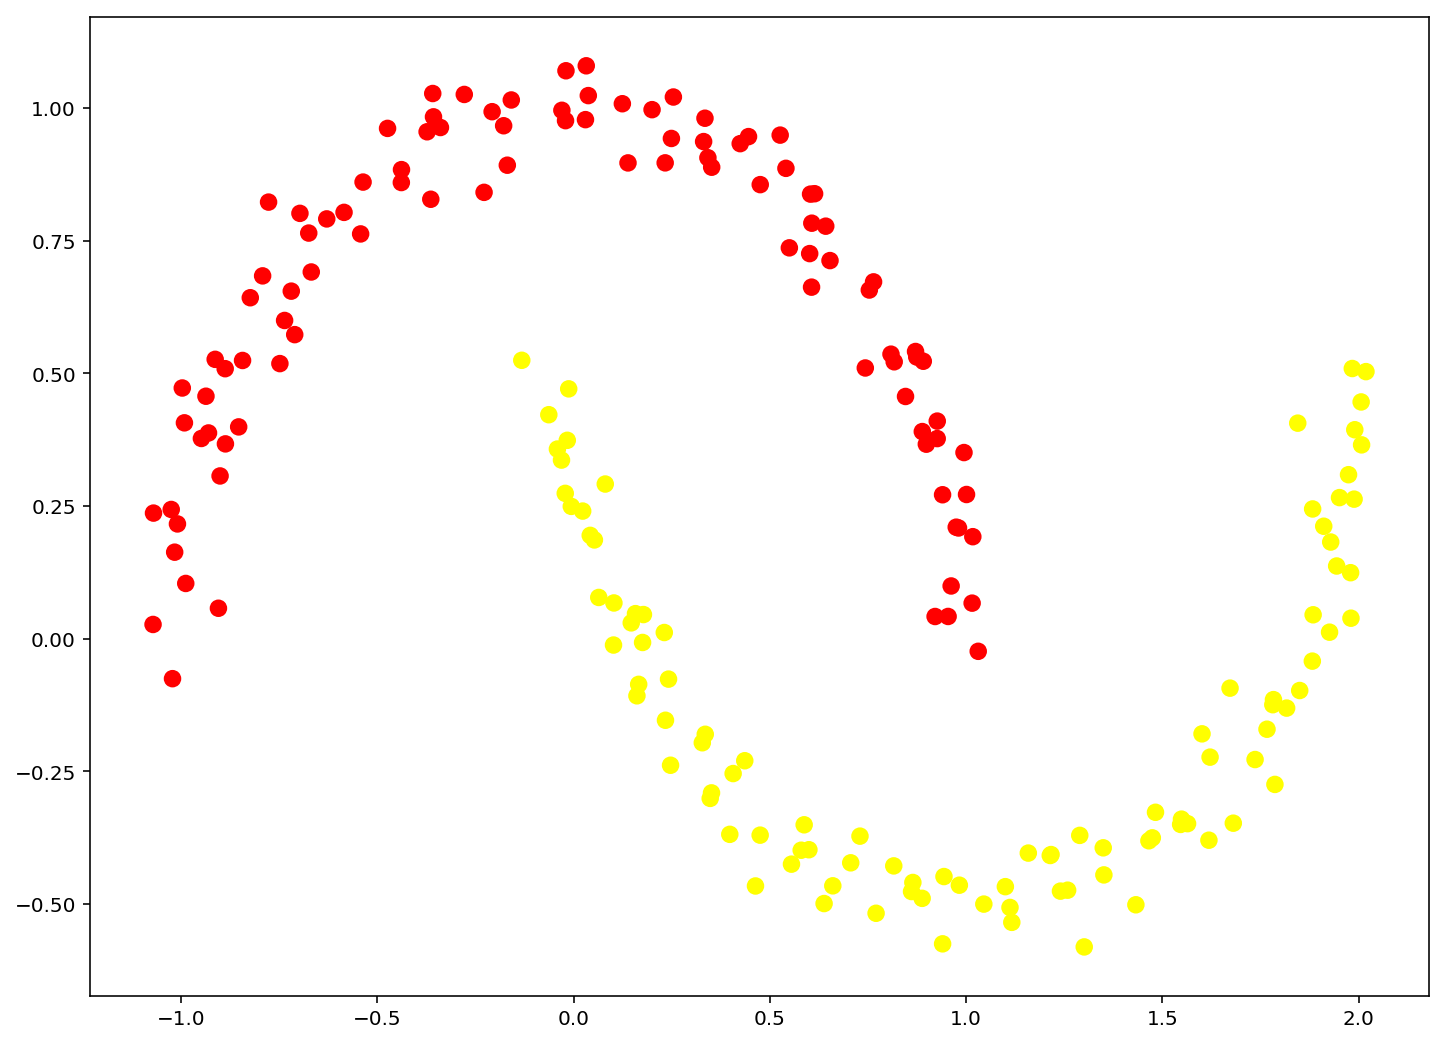

In [46]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=60)

приведём данные по обеим осям к нормальному распределению

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
X_scaled = scaler.fit_transform(X)

In [50]:
type(X_scaled)

numpy.ndarray

форма осталась, но диапазоны выровнялись:

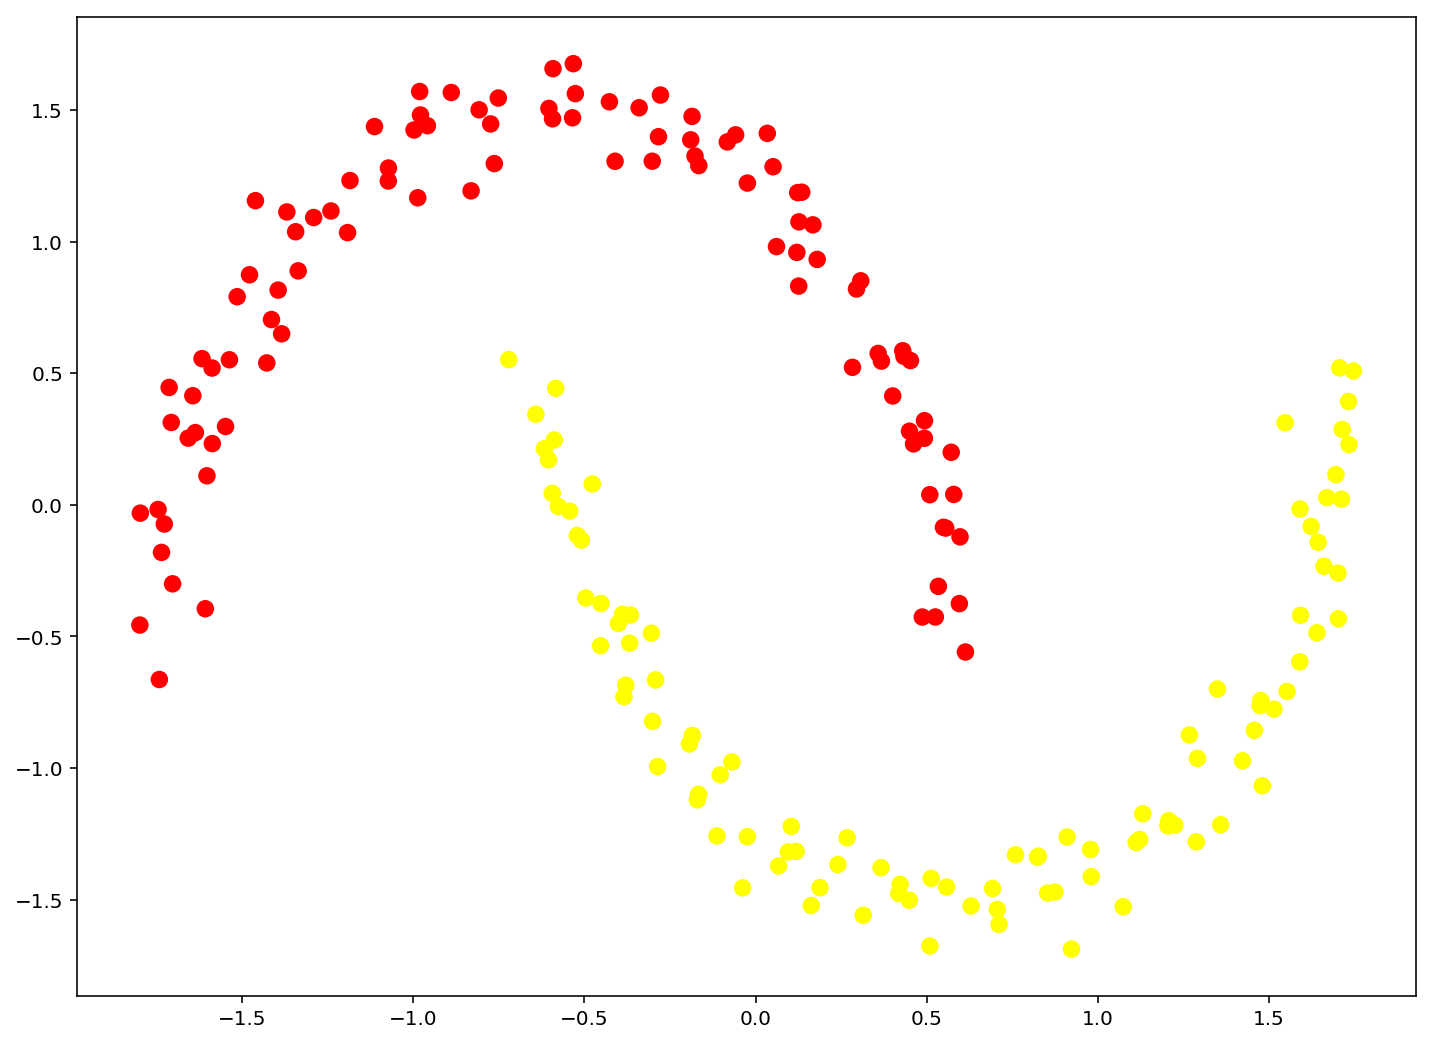

In [51]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn', s=60)

### Кластеризация

теперь кластеризуем с помощью различных методов

In [52]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [53]:
algorithms = [
    AffinityPropagation(),
    KMeans(n_clusters=2),
    AgglomerativeClustering(n_clusters=2),
    DBSCAN(),
]

сделаем случайное предсказание

In [54]:
clusters_random = np.random.randint(low=0, high=2, size=len(X))

In [55]:
clusters_random

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

и функцию-заготовку, которая считает 2 метрики качества и генерирует заголовки для графиков

In [56]:
def get_descr(algo_name, y, y_pred, X):
    return "{}\nARI {:.2f}\nSilhouette {:.2f}".format(
        algo_name,
        adjusted_rand_score(y, y_pred),
        silhouette_score(X, y_pred)
    )

In [57]:
import warnings
warnings.filterwarnings('ignore')

проследите за ростом ARI и за падением Silhouette (хотя этот показатель по своему назначению тоже должен расти):

In [58]:
X_scaled

array([[ 0.36748451,  0.54576641],
       [ 1.28731953, -1.2803031 ],
       [-0.59397643,  0.04357482],
       [-1.74182239, -0.66371706],
       [ 1.45705144, -0.85667812],
       [ 1.58953574, -0.59675854],
       [ 0.54875768, -0.08552893],
       [ 0.44914675, -1.50218876],
       [ 0.46138047,  0.23124986],
       [ 0.71117525, -1.59382202],
       [-0.98693652,  1.16613579],
       [-0.28618307, -0.9941549 ],
       [ 1.51445888, -0.7760272 ],
       [ 0.82589866, -1.33505302],
       [-1.51451022,  0.79027655],
       [ 0.55545785, -0.08853775],
       [ 0.05104108,  1.284163  ],
       [-0.17030547, -1.12065006],
       [-0.1659644 ,  1.28843594],
       [-1.46106881,  1.15527198],
       [ 1.63987535, -0.48630812],
       [ 0.41814803, -1.47618916],
       [-0.34023715,  1.50810931],
       [ 0.90980627, -1.26183242],
       [-0.88905065,  1.56616629],
       [-0.29208555, -0.66541512],
       [ 1.55266276, -0.70888274],
       [ 1.59187607, -0.4198694 ],
       [-0.37934026,

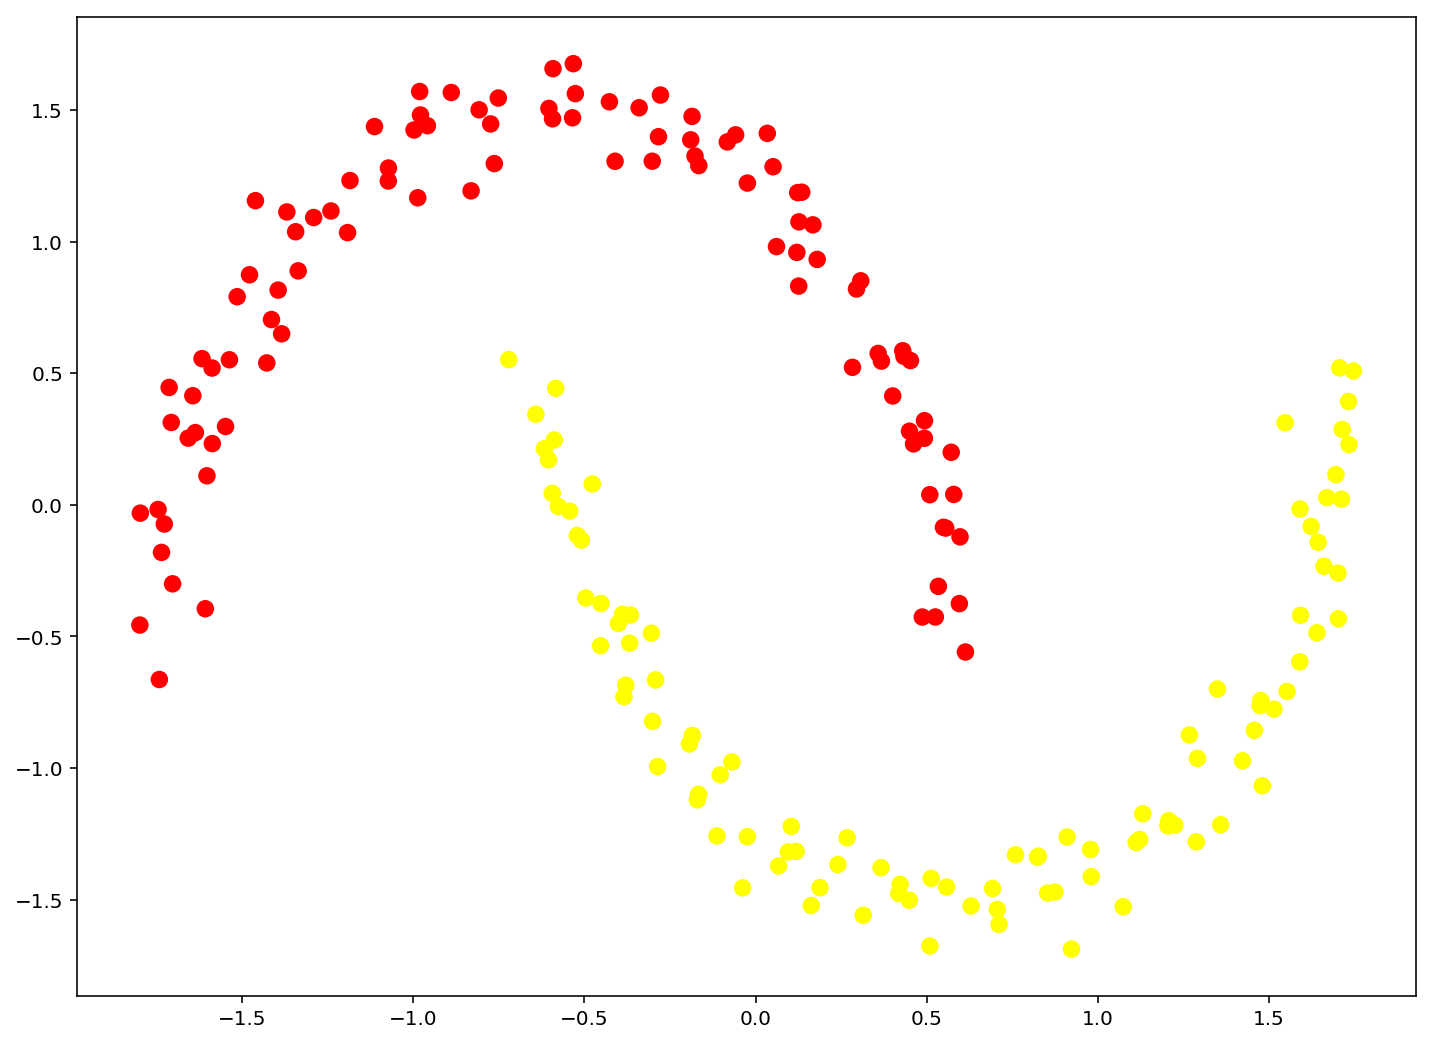

In [59]:
#fig, axes = plt.subplots(1, 2, figsize=(15, 2))
#for ax, algorithm in zip(axes[1:], algorithms):
    # кластеризуем и выводим картинку
clusters = DBSCAN().fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60)

    


# Подбор количества кластеров для KMeans

KMeans минимизирует сумму квадратов расстояний объектов классов до их центроидов. В обученном классификаторе это значение находится в поле inertia_

Посчитаем значения inertia при разном количестве кластеров. Они объективно стремятся к нулю с ростом числа кластеров (предельный случай: каждый объект - кластер, расстояние = 0)

In [60]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

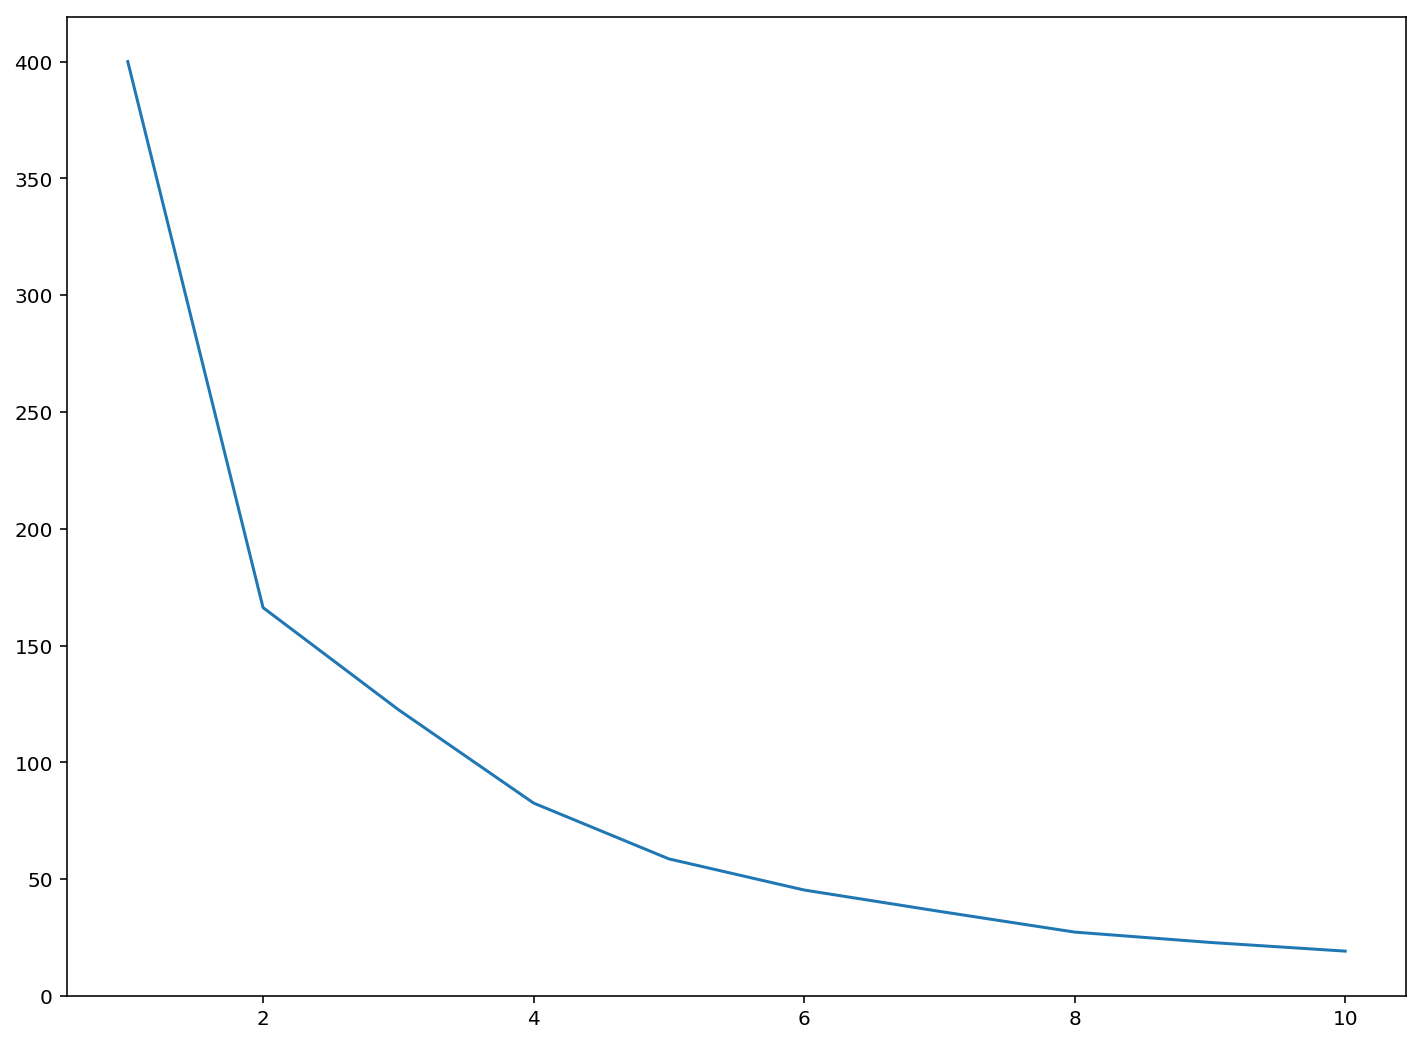

In [61]:
plt.plot(ks, k_inertia)

Как подобрать оптимальное значение? Будем на каждом шаге смотреть изменение inertia, и в тот момент, когда оно резко замедлится (относительно предыдущего изменения) мы и остановимся

Для начала считаем сами изменения

$${inertia_{k+1}-inertia_{k}}$$

In [62]:
diff = np.diff(k_inertia)

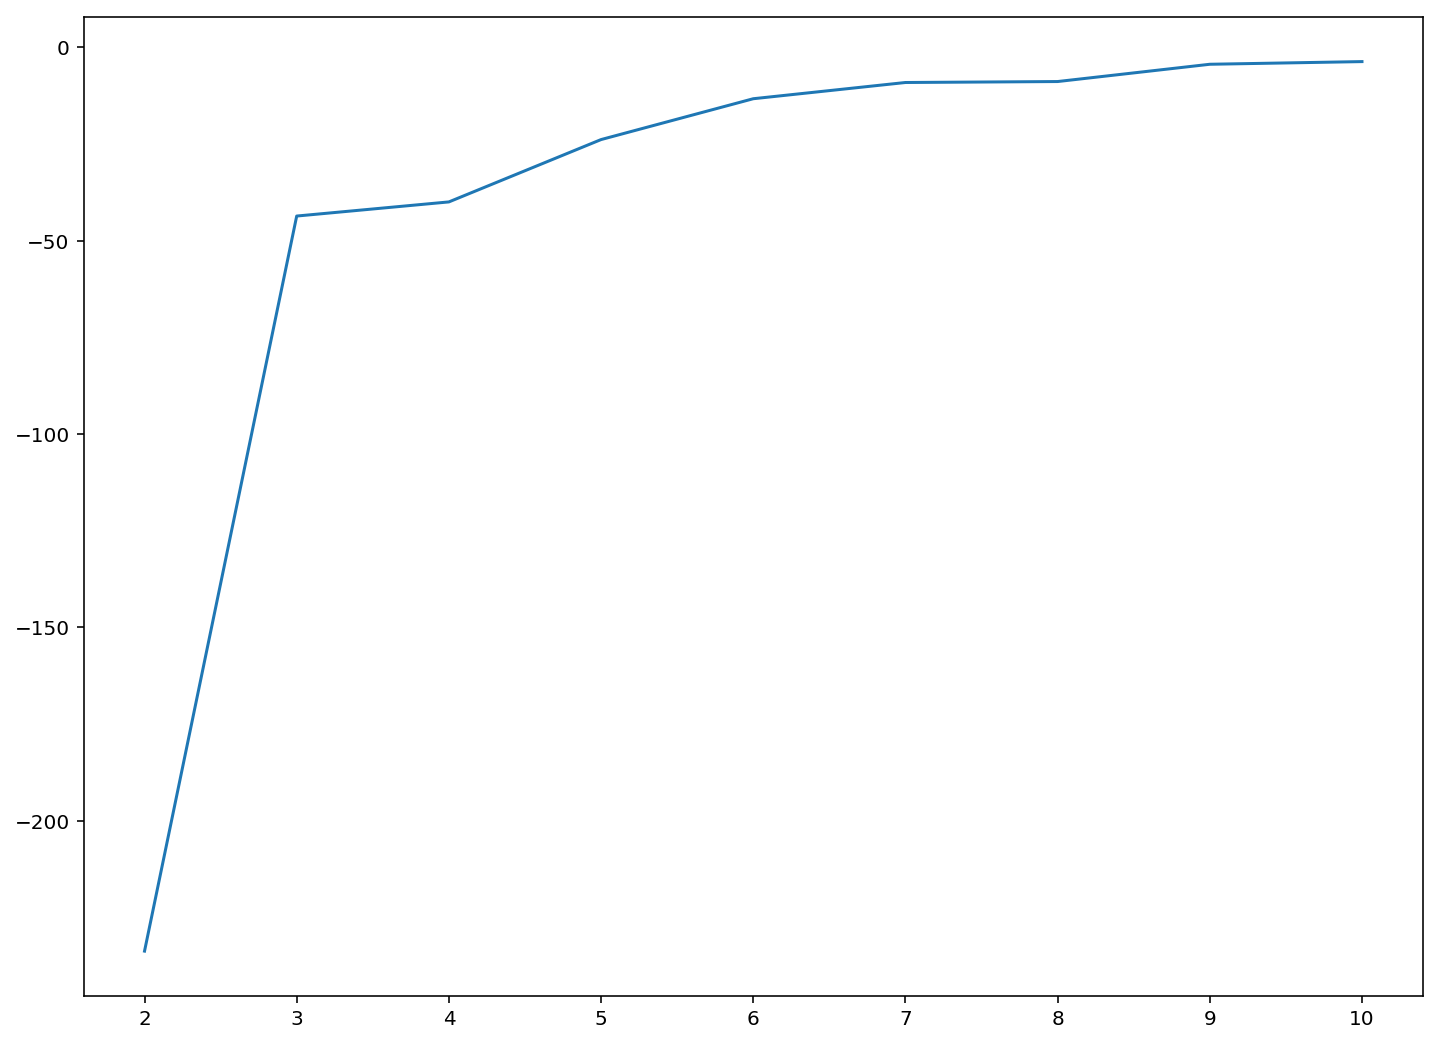

In [63]:
plt.plot(ks[1:], diff)

Теперь можно найти оптимальное число кластеров по этой формуле:

$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

In [64]:
diff_r = diff[1:] / diff[:-1]

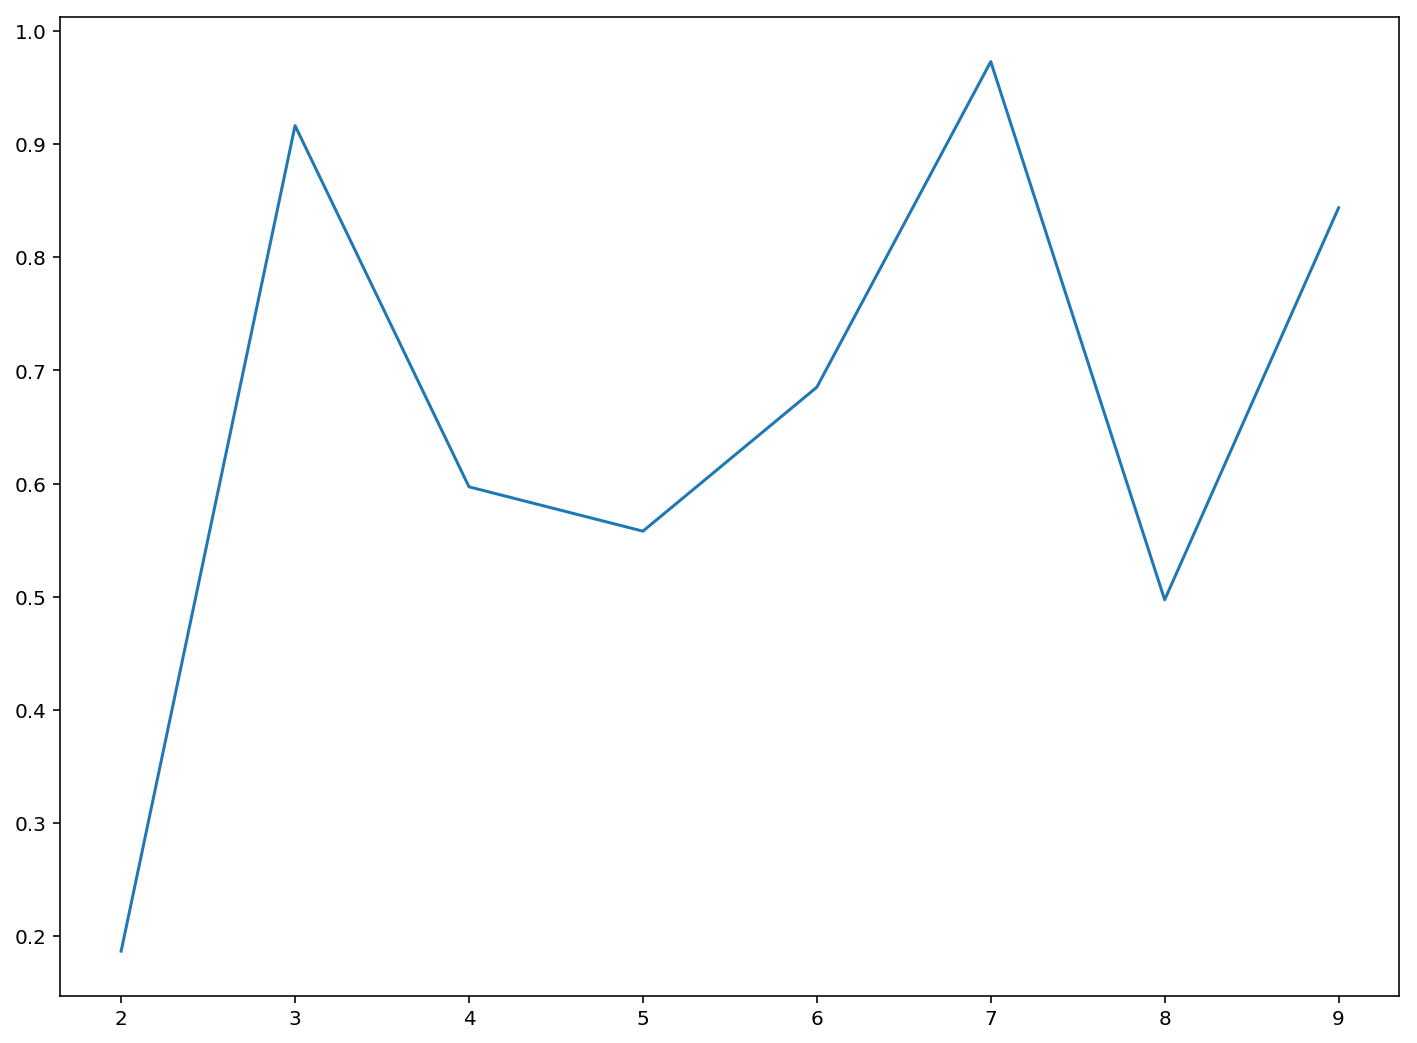

In [65]:
plt.plot(ks[1:-1], diff_r)

In [66]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

Отмечу, что это эвристика и совсем не гарантирует наилучшее разбиение